In [39]:
import os, glob
import pandas as pd
from helper import *
import datetime
import numpy as np
from sklearn import preprocessing
import statsmodels.formula.api as smf
import seaborn as sns
pwd = os.path.dirname(os.path.realpath('.'))
data_folder = pwd + '/Data'
data_2018 = data_folder + '/2018'

In [2]:
list_of_speed_files_2018 = glob.glob(data_2018+'/speed_for_chunks/*')
list_of_csv_files_2018 = glob.glob(data_2018+'/2018_results/*')
annotations = pd.read_excel(data_2018+'/annotation.xlsx')
# len(list_of_csv_files_2018)

In [3]:
#  filter unvalid files
annotations = annotations[annotations.is_valid == 'Y']

In [4]:
name_of_csv_files_2018 = [i.split('/')[-1].split('.')[0] for i in list_of_csv_files_2018]
valid_files = [i for i in annotations.filename]
cnt = 0
for i in valid_files:
    if i in name_of_csv_files_2018:
        cnt += 1
assert cnt == len(valid_files), "Not all the files found!"

In [5]:
cnt = 0
dataset = pd.DataFrame()
not_processed = []
for j in annotations.filename:
    for i in name_of_csv_files_2018:
        if i == j:
            print("Processing file: ", j)
            try:
                file = [k for k in list_of_speed_files_2018 if k.split('/')[-1].split('.')[0][:-6] == j][0]
            except:
                print('Could not process ', j)
                print('Speed profile could not be found!')
                not_processed.append(j)
                break
            df_raw_speed = prepare_speed_profiles_for_model(file)

            file = [k for k in list_of_csv_files_2018 if k.split('/')[-1].split('.')[0] == j][0]

            df_detection = prepare_detections_for_model(file, df_raw_speed)
            df_detection = merge_speed_and_detection(df_detection, df_raw_speed, annotations, filename=i)

            dataset = pd.concat([dataset,df_detection])

            cnt += 1

    if cnt%10 == 0:
        print(len(list_of_speed_files_2018)-cnt, " files remained!")
        print(cnt, ' file processed!')

Processing file:  unit01_2018-09-26_20_38_20_1_2832
Processing file:  unit01_2018-09-26_22_29_30_1_7032
Processing file:  unit01_2018-09-26_22_29_30_4_28392
Processing file:  unit01_2018-09-26_23_17_50_3_25560
Processing file:  unit01_2018-10-17_15_03_17_15_83064
Processing file:  unit01_2018-10-18_15_22_15_1_66288
Processing file:  unit01_2018-10-19_21_13_40_1_1
Processing file:  unit01_2018-10-20_16_57_49_2_103512
Processing file:  unit01_2018-10-20_16_57_49_3_105384
Processing file:  unit01_2018-10-21_19_16_24_1_480
433  files remained!
10  file processed!
Processing file:  unit01_2018-10-21_19_16_24_2_2520
Processing file:  unit01_2018-10-21_22_59_02_1_1272
Processing file:  unit01_2018-10-21_22_59_02_2_12192
Processing file:  unit01_2018-10-21_22_59_02_4_20376
Processing file:  unit01_2018-10-22_20_55_26_8_257952
Processing file:  unit01_2018-10-24_20_15_45_17_292464
Processing file:  unit01_2018-10-26_17_54_18_2_89472
Processing file:  unit01_2018-10-26_17_54_18_3_90888
Processin

Processing file:  unit06_2018-10-31_20_05_26_5_73608
Processing file:  unit06_2018-11-01_15_26_32_1_11664
Processing file:  unit06_2018-11-01_20_27_26_1_16776
Processing file:  unit06_2018-11-02_22_49_05_4_48720
Processing file:  unit06_2018-11-08_19_54_45_5_28536
Processing file:  unit06_2018-11-10_19_52_58_1_21024
Processing file:  unit06_2018-11-11_16_06_42_11_217608
Processing file:  unit06_2018-11-11_16_06_42_28_354720
313  files remained!
130  file processed!
Processing file:  unit06_2018-11-11_16_06_42_29_356328
Processing file:  unit06_2018-11-11_16_06_42_5_131928
Processing file:  unit06_2018-11-11_16_06_42_6_135744
Processing file:  unit06_2018-11-11_16_06_42_9_203520
Processing file:  unit06_2018-11-15_19_57_43_1_1
Processing file:  unit06_2018-11-15_21_05_52_1_3216
Processing file:  unit07_2018-11-01_01_11_57_1_57432
Processing file:  unit07_2018-11-01_21_42_10_8_83376
Processing file:  unit07_2018-11-02_21_18_46_17_116208
Processing file:  unit07_2018-11-02_21_18_46_20_147

Processing file:  unit14_2018-11-13_17_11_22_4_116736
183  files remained!
260  file processed!
Processing file:  unit14_2018-11-13_17_11_22_5_121056
Processing file:  unit14_2018-11-14_17_54_33_3_20328
Processing file:  unit14_2018-11-16_18_30_16_2_7632
Processing file:  unit15_2018-10-29_19_26_30_1_1
Processing file:  unit15_2018-10-29_19_26_30_2_792
Processing file:  unit15_2018-10-29_19_26_30_3_7920
Processing file:  unit15_2018-10-29_20_08_51_2_9960
Processing file:  unit15_2018-10-29_20_08_51_3_11520
Processing file:  unit15_2018-10-29_20_08_51_4_14040
Processing file:  unit15_2018-11-01_20_01_20_1_1776
173  files remained!
270  file processed!
Processing file:  unit15_2018-11-01_21_04_26_1_1032
Processing file:  unit15_2018-11-01_21_04_26_2_3384
Processing file:  unit15_2018-11-02_14_40_04_1_1728
Processing file:  unit15_2018-11-02_15_42_28_2_2016
Processing file:  unit15_2018-11-02_15_42_28_7_29184
Processing file:  unit15_2018-11-02_16_31_03_5_7848
Processing file:  unit15_201

43  files remained!
400  file processed!
Processing file:  unit20_2018-10-25_19_31_56_1_4512
Processing file:  unit20_2018-11-20_19_54_41_1_1
Processing file:  unit20_2018-11-20_19_54_41_5_19536
Processing file:  unit20_2018-11-21_17_51_06_1_432
Processing file:  unit20_2018-11-23_16_54_18_1_192
Processing file:  unit20_2018-11-23_17_09_27_1_2160
Processing file:  unit20_2018-11-23_17_09_27_4_27840
Processing file:  unit21_2018-09-29_14_07_35_1_5592
Processing file:  unit21_2018-09-29_14_07_35_2_7080
Processing file:  unit21_2018-09-29_14_07_35_3_8184
33  files remained!
410  file processed!
Processing file:  unit21_2018-09-29_14_07_35_4_12936
Processing file:  unit21_2018-09-29_14_07_35_5_18792
Processing file:  unit21_2018-09-29_14_07_35_6_19704
Processing file:  unit21_2018-09-29_15_41_27_1_552
Processing file:  unit21_2018-09-29_15_41_27_3_4392
Processing file:  unit21_2018-09-29_15_41_27_4_7392
Processing file:  unit21_2018-09-29_15_41_27_6_11088
Processing file:  unit21_2018-09-2

In [6]:
dataset.to_csv('../Data/dataset.csv')

In [10]:
dataframe= pd.DataFrame(not_processed)
dataframe.to_csv('../Data/not_processed.csv')

In [59]:
dataset = pd.read_csv('../Data/dataset.csv')
not_processed = pd.read_csv('../Data/not_processed.csv')

In [49]:
dataset.head()

,Unnamed: 0,frame_num,dist,center,datetime_time,Speed_MPH,filename,Type of vehicle,Type of road
0,0,400,130.164318,671.050296,20:40:00,16.380240,unit01_2018-09-26_20_38_20_1_2832,SUV,PAVED
1,1,401,110.139038,671.760746,20:40:00,16.387478,unit01_2018-09-26_20_38_20_1_2832,SUV,PAVED
2,2,402,110.139038,669.654015,20:40:00,16.394717,unit01_2018-09-26_20_38_20_1_2832,SUV,PAVED
3,3,403,110.139038,671.081590,20:40:00,16.401956,unit01_2018-09-26_20_38_20_1_2832,SUV,PAVED
4,4,404,110.139038,672.512082,20:40:00,16.409195,unit01_2018-09-26_20_38_20_1_2832,SUV,PAVED


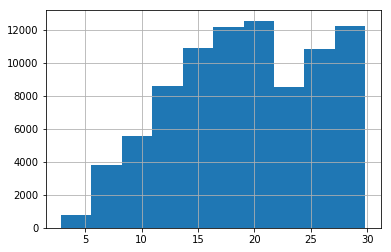

In [69]:
dataset = dataset[dataset.dist < 30]
dataset.dist.hist()

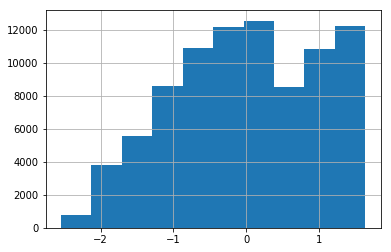

In [80]:
dataset.dist = preprocessing.scale(dataset.dist)
dataset.dist.hist()

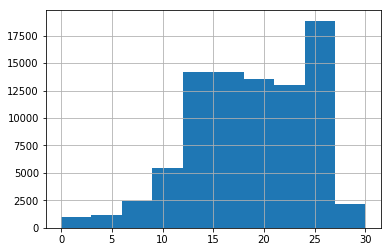

In [70]:
dataset = dataset[dataset.Speed_MPH < 30]
dataset.Speed_MPH.hist()

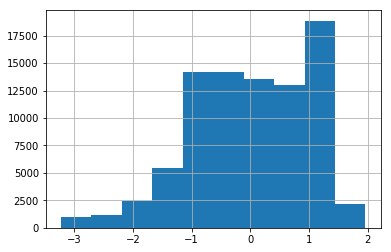

In [81]:
dataset.Speed_MPH = preprocessing.scale(dataset.Speed_MPH)
dataset.Speed_MPH.hist()

In [71]:
dataset.columns = ['Unnamed:_0', 'frame_num', 'dist', 'center', 'datetime_time',
       'Speed_MPH', 'filename', 'vehicle_type', 'road_type']
dataset.head()

,Unnamed:_0,frame_num,dist,center,datetime_time,Speed_MPH,filename,vehicle_type,road_type
584,584,1013,29.829323,640.784675,20:40:38,8.802736,unit01_2018-09-26_20_38_20_1_2832,SUV,PAVED
587,587,1016,28.636150,632.823040,20:40:38,8.544085,unit01_2018-09-26_20_38_20_1_2832,SUV,PAVED
590,590,1019,28.636150,626.118399,20:40:38,8.285433,unit01_2018-09-26_20_38_20_1_2832,SUV,PAVED
591,591,1020,29.829323,625.102592,20:40:38,8.199216,unit01_2018-09-26_20_38_20_1_2832,SUV,PAVED
594,594,1023,29.829323,619.565372,20:40:39,8.112999,unit01_2018-09-26_20_38_20_1_2832,SUV,PAVED


In [ ]:
# construct our model, but this time we will have a random interecept AND a random slope with respect to age
md = smf.mixedlm("dist ~ 1 + Speed_MPH + C(road_type) + C(vehicle_type)", dataset, groups=dataset["filename"], re_formula="~ Speed_MPH + C(road_type) + C(vehicle_type)")
mdf = md.fit()
print(mdf.summary())

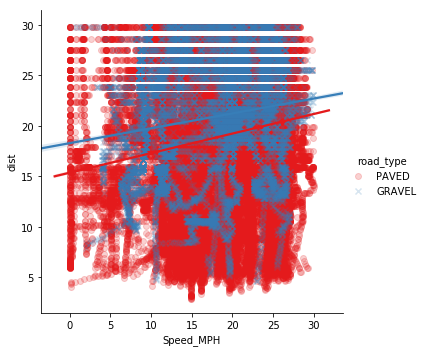

In [77]:
sns.lmplot(x = "Speed_MPH", y = "dist", data = dataset, scatter_kws={'alpha':0.2},
           hue="road_type", markers=["o", "x"], palette="Set1")

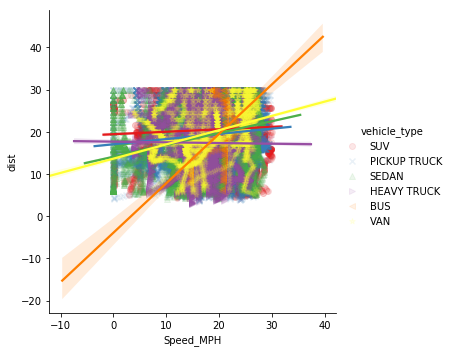

In [78]:
sns.lmplot(x = "Speed_MPH", y = "dist", data = dataset, scatter_kws={'alpha':0.1},
           hue="vehicle_type", markers=["o", "x", "^", ">", "<", "*"], palette="Set1")